In [1]:
import numpy as np
from matplotlib.text import Text
from matplotlib import pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from IPython.display import display

In [2]:
from cana.datasets.bio import TEMPY
from cana.datasets.bio import (
    THALIANA,
    DROSOPHILA,
    BUDDING_YEAST,
    MARQUESPITA,
    LEUKEMIA,
    BREAST_CANCER,
)
from cana.boolean_node import BooleanNode
from cana.drawing.schema_vis import plot_schemata
from cana.drawing.plot_look_up_table import plot_look_up_table
from cana.utils import fill_out_lut

from cana.boolean_node import BooleanNode
from cana.boolean_network import BooleanNetwork

In [3]:
# modified the BooleanNetwork.from_string_cnet function that is called in the BooleanNetwork.from_file function to check for duplicate values in the inputs and outputs of the nodes.
# this will print a warning message if there are duplicate values in the inputs and outputs of the nodes.
# This also generates a lookup table data for nodes with k>1

# plot_schemata(tempy.nodes[4])
# plot_look_up_table(tempy.nodes[4])

In [4]:
thaliana = THALIANA()
drosophila = DROSOPHILA()
budding_yeast = BUDDING_YEAST()
marquespita = MARQUESPITA()
leukemia = LEUKEMIA()
breast_cancer = BREAST_CANCER()
tempy = TEMPY()

Entry clash in node  5  for  {'000'}  i.e. State number:  0


In [5]:
# plot_schemata(node)
# print(node.schemata_look_up_table(type="pi"))

In [6]:

node = tempy.nodes[6]
# plot_look_up_table(node)
# plot_schemata(node)
print(node.look_up_table())
print(node.schemata_look_up_table(type="pi"))
print(node)


       In: Out:
0   000000    0
1   000001    0
2   000010    0
3   000011    0
4   000100    0
..     ...  ...
59  111011    0
60  111100    0
61  111101    0
62  111110    0
63  111111    0

[64 rows x 2 columns]
     Input  Output
0   0##000       0
1   #1####       0
2   1##111       0
3   ##0###       0
4   1010##       1
5   #01#10       1
6   0011##       1
7   #0101#       1
8   001#1#       1
9   #011#0       1
10  001##1       1
11  101##0       1
12  #01#01       1
13  #010#1       1
14  #0110#       1
15  101#0#       1
<BNode(id=6, name='Seven', k=6, inputs=[0,1,2,3,4,5], state='0', outputs=[0,0,0,0...0,0,0,0] constant=False)>


In [7]:
# find bias of the lut of node
node.look_up_table()
print(node.bias())


0.21875


generating permutations of output lists for incomplete data

In [8]:
# # need to modify the output list from data function to include the this following function
# def from_output_list_with_missing_data(outputs=list(), *args, **kwargs):
#     """
#     Instanciate a Boolean Node from a output transition list.

#     For missing data labeled as '#', '-', None, or 'x': In this case, we replace the missing data with a placeholder value, such as '-'. This allows us to maintain the structure of the outputs list while indicating that the data is missing.

#     Complete line missing: If a complete line is missing from the outputs list, we can generate the missing rows as incomplete data. This can be done by extending the outputs list with the placeholder value '-' until it reaches the expected length of 2^k, where k is the number of inputs.

#     Args:
#         outputs (list) : The transition outputs of the node.

#     Returns:
#         (BooleanNode) : the instanciated object.

#     Example:
#         >>> BooleanNode.from_output_list_with_missing_data(outputs=[0,0,0,'-',1], name="AND")
#     """
#     id = kwargs.pop("id") if "id" in kwargs else 0
#     name = kwargs.pop("name") if "name" in kwargs else "x"
#     k = int(np.ceil(np.log2(len(outputs))))
#     inputs = kwargs.pop("inputs") if "inputs" in kwargs else [(x + 1) for x in range(k)]
#     state = kwargs.pop("state") if "state" in kwargs else False

#     # Replace 'None', '-', '#', or 'x' with '-'.
#     for i in range(len(outputs)):
#         if outputs[i] in [None, "-", "#", "x"]:
#             outputs[i] = "-"  # Placeholder value for missing data
#             print(
#                 "Some of the lines contain data in the form of 'x', '#', None or '-'. These have been replaced with the placeholder value '-'. for internal consistency."
#             )

#     # Generate extra lines in the table to account for missing lines
#     if len(outputs) < 2**k:
#         print(
#             f"Some of the lines in the data are missing and have been replaced with the placeholder value '-' for upto 2^k lines. i.e. the total lines inputted are {len(outputs)}, then the function will generate the missing rows for upto 2^{k} = {2**k} lines."
#         )
#         outputs.extend(["-"] * (2**k - len(outputs)))

#     return BooleanNode(
#         id=id,
#         name=name,
#         k=k,
#         inputs=inputs,
#         state=state,
#         outputs=outputs,
#         *args,
#         **kwargs,
#     )


# def generate_output_list_permutations(incomplete_boolean_node):
#     # generating all possible output_list permutations for the incomplete boolean node.

#     outputs = incomplete_boolean_node.outputs
#     print(outputs)
#     missing_data_indices = [i for i, x in enumerate(outputs) if x == '-']
#     # output_list_permutations = [outputs.copy() for _ in range(2 ** len(missing_data_indices))]

#     #generating binarytable for size: no. of missing values
#     table=[]
#     output_list_permutations=[]
#     for i in range(2 ** len(missing_data_indices)):
#             row = [int(x) for x in bin(i)[2:].zfill(len(missing_data_indices))]
#             table.append(row)
#             output_list_permutations.append(outputs.copy())
#             for j in range(len(missing_data_indices)):
#                 output_list_permutations[i][missing_data_indices[j]] = table[i][j]
#     return output_list_permutations

In [9]:
incomplete_output = [0, 0, None, 1, 1, 0]
# incomplete_output = tempy.nodes[5].outputs.copy()
incomplete_output


# creating a boolean node for incomplete data
# incomplete_boolean_node = from_output_list_with_missing_data(incomplete_output)
# print(incomplete_boolean_node)
# output_list_permutations = generate_output_list_permutations(incomplete_boolean_node)
# print(f'Following are the pemutations of the incomplete output list of length:{len(output_list_permutations)}')
# output_list_permutations

[0, 0, None, 1, 1, 0]

In [10]:
# incomplete_boolean_node.look_up_table()

Added missing data code to the from_output_list funciton in boolean_node.py. 

  Input  Output
0    #0       0
1    #1       1


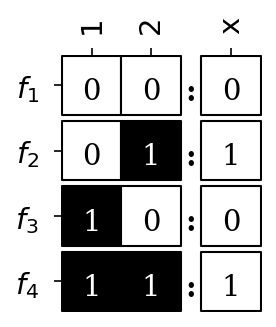

  In: Out:
0  00    0
1  01    1
2  10    0
3  11    1


In [11]:
# # testing modified from_output_list function
# incomplete_output = [0,0, None, 1,1,0]
# incomplete_boolean_node = BooleanNode.from_output_list(incomplete_output)
# print(incomplete_boolean_node.outputs)
# incomplete_boolean_node.look_up_table()
AND = BooleanNode.from_output_list([0, 1, 0, 1])
print(AND.schemata_look_up_table(type="pi"))
plot_look_up_table(AND)
print(AND.look_up_table())

In [12]:
# # partial_lut = [('1--','1'),('101','0'),('011','0'),('01-','1')]
# # partial_lut = [('0--0','0'),('1--1','0'),('0111','1'),('0011','1')]
partial_lut = [('00--', '0'), ('1--1', '1'), ('11--', '0')]
# partial_lut = [('00--', '0'), ('01--', '1'), ('10--', '1'), ('11--', '0')]
print(partial_lut)
generated_lut = fill_out_lut(partial_lut)
print(generated_lut)

[('00--', '0'), ('1--1', '1'), ('11--', '0')]
Clashing output values for entry: 1101
Clashing output values for entry: 1111
[('0000', '0'), ('0001', '0'), ('0010', '0'), ('0011', '0'), ('0100', '?'), ('0101', '?'), ('0110', '?'), ('0111', '?'), ('1000', '?'), ('1001', '1'), ('1010', '?'), ('1011', '1'), ('1100', '0'), ('1101', '!'), ('1110', '0'), ('1111', '!')]


In [13]:
# write a function that converts  datya in the example form 00-- 0\n1--1 1\n11-- 0 to this example form: ('00--','0'),('1--1','1'),('11--','0')
def from_example_form_to_list(example_form):
    example_form = example_form.split("\n")
    example_form = [tuple(x.split(" ")) for x in example_form]
    return example_form


print(from_example_form_to_list("---1 0\n-1-- 0\n1--- 0\n--1- 0\n0000 1"))


# write a function that converts data in the example form ('00--','0'),('1--1','1'),('11--','0') to this example form: 00-- 0\n1--1 1\n11-- 0
def from_list_to_example_form(example_form):
    example_form = [x[0] + " " + x[1] for x in example_form]
    example_form = "\n".join(example_form)
    return example_form


print(from_list_to_example_form(generated_lut))

[('---1', '0'), ('-1--', '0'), ('1---', '0'), ('--1-', '0'), ('0000', '1')]
0000 0
0001 0
0010 0
0011 0
0100 ?
0101 ?
0110 ?
0111 ?
1000 ?
1001 1
1010 ?
1011 1
1100 0
1101 !
1110 0
1111 !


In [14]:
print(len(generated_lut))
output = []
output = [generated_lut[i][1] for i in range(len(generated_lut))]
output


16


['0',
 '0',
 '0',
 '0',
 '?',
 '?',
 '?',
 '?',
 '?',
 '1',
 '?',
 '1',
 '0',
 '!',
 '0',
 '!']

In [15]:
generated_lut = fill_out_lut(partial_lut)
output_list = [x[1] for x in generated_lut]
print(output_list)
generated_node = BooleanNode.from_output_list(output_list)
generated_node.look_up_table()


Clashing output values for entry: 1101
Clashing output values for entry: 1111
['0', '0', '0', '0', '?', '?', '?', '?', '?', '1', '?', '1', '0', '!', '0', '!']


,In:,Out:
0,0000,0
1,0001,0
2,0010,0
3,0011,0
4,0100,?
5,0101,?
6,0110,?
7,0111,?
8,1000,?
9,1001,1


In [16]:
generated_node = BooleanNode.from_partial_lut(partial_lut)
print(generated_node.outputs)
print(generated_node.look_up_table())

Clashing output values for entry: 1101
Clashing output values for entry: 1111
The LUT is incomplete. Missing values are represented by '?'
['0', '0', '0', '0', '?', '?', '?', '?', '?', '1', '?', '1', '0', '!', '0', '!']
     In: Out:
0   0000    0
1   0001    0
2   0010    0
3   0011    0
4   0100    ?
5   0101    ?
6   0110    ?
7   0111    ?
8   1000    ?
9   1001    1
10  1010    ?
11  1011    1
12  1100    0
13  1101    !
14  1110    0
15  1111    !


In [17]:
logic = {
    0: {'name': 'A', 'in': [1,0], 'out': [0, 1, 0,1]},
    1: {'name': 'B', 'in': [0,2], 'out': [0, 1, 0, 1]},
    2: {'name': 'C', 'in': [0,1,2], 'out': [0, 1, 1, 0, 0, 1, 1, 0]}
}
# Instanciate the BooleanNetwork
bn = BooleanNetwork.from_dict(logic)
bn.nodes[0].outputs

['0', '1', '0', '1']

In [18]:
bn = BooleanNode.from_partial_lut(partial_lut=[('00', 0), ('01', 1), ('11', 1)], name="EG")
print(bn)

The LUT is incomplete. Missing values are represented by '?'
<BNode(id=0, name='EG', k=2, inputs=[1,2], state='0', outputs=[0,1,?,1] constant=False)>
